# Principal components analysis

Let's do some simple principal components analysis (PCA) with 2-d data. We'll
go with 2-d data, so it is easy to plot. Let's start by creating some fake data. (The same fake data as can be found in the [scikit-learn documentation on PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca).)

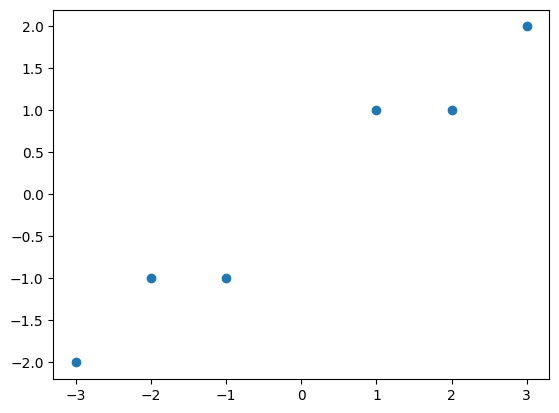

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:, 0], X[:, 1])
plt.show()
print(X)

Clearly the data is more spread out in the first dimension than in the second. We can quantify this by computing the sample variance in each direction. Here we use `np.var` with default parameters which computes sample variance by dividing the sum of squared distances from mean by $N$, where $N$ is the number of datapoints. This is the MLE for the population variance and is a biased estimate for it.

In [2]:
for i, dim in enumerate(("first", "second")):
    print(
        "Here is the data in the {0} dimension along with its sample variance".format(
            dim
        )
    )
    print("data = {0}\nvar = {1}\n\n".format(X[:, i], np.var(X[:, i])))

Here is the data in the first dimension along with its sample variance
data = [-1 -2 -3  1  2  3]
var = 4.666666666666667


Here is the data in the second dimension along with its sample variance
data = [-1 -1 -2  1  1  2]
var = 2.0



What we just did was to take 2-dimensional data and project it down to 1-dimensional data. We used 2 different projections, and these 2 projections were *orthogonal* (i.e. at right angles to each other). To make the notion of 'projection' more precise we can formalise it as matrix multiplication.

In [3]:
print("Here are the dimensions of the data matrix: ", X.shape)
print("We can multiply by a 2x1 matrix to project down to 1 dim:")
p1 = np.matmul(X, np.array([1, 0]))
print(p1)
print(p1.shape)
print("And multiply by a differnt 2x1 matrix for a different projection:")
p2 = np.matmul(X, np.array([0, 1]))
print(p2)
print(p2.shape)
print("The two projections are orthogonal: ")
print(np.matmul(np.transpose(np.array([1, 0])), np.array([0, 1])))

Here are the dimensions of the data matrix:  (6, 2)
We can multiply by a 2x1 matrix to project down to 1 dim:
[-1 -2 -3  1  2  3]
(6,)
And multiply by a differnt 2x1 matrix for a different projection:
[-1 -1 -2  1  1  2]
(6,)
The two projections are orthogonal: 
0


PCA just chooses different projections from the above 'standard' ones. Just like above, the projections (which are just column vectors, here 2x1) will all be orthogonal to each other. The first PCA projection maximises variance, the second maximises variance *subject to the constraint of being orthogonal to the first*. Subsequent projections maximise variance subject to being orthogonal to all earlier projections. The vectors effecting these projections are called *principal component directions*. Each projects the data onto a different vector; these vectors of transformed data are called *principal components*.

In our current example there are only two dimensions, so once the first principal component is found, the second is determined.

To do PCA with scikit-learn, we create a PCA object (in this case specifying that we wish to keep both dimensions), then call its `fit` method. Then we can project the data onto the two principal components, print out the transformed data together with the two principal components and do a scatter plot of the transformed data.

Transformed data
 [[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]

Principal component directions
 [[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


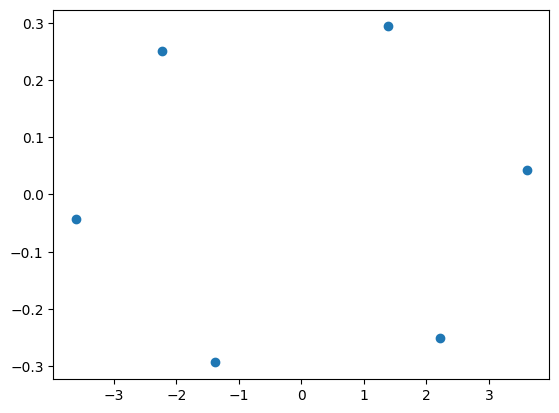

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.fit_transform(X)
print("Transformed data\n", newX)
print()
plt.scatter(newX[:, 0], newX[:, 1])
print("Principal component directions\n", pca.components_)
plt.show()

We have rotated the data, so that the datapoints have maximal variance horizontally (first principal component) and minimal variance vertically (second principal component). Let's compute those two variances.

In [5]:
for i, dim in enumerate(("first", "second")):
    print(
        "Here is the {0} principal component along with its sample variance".format(dim)
    )
    print("data = {0}\nvar = {1}\n\n".format(newX[:, i], np.var(newX[:, i])))

Here is the first principal component along with its sample variance
data = [ 1.38340578  2.22189802  3.6053038  -1.38340578 -2.22189802 -3.6053038 ]
var = 6.616285933932036


Here is the second principal component along with its sample variance
data = [ 0.2935787  -0.25133484  0.04224385 -0.2935787   0.25133484 -0.04224385]
var = 0.050380732734631783



Note also that the transformed data is 'centred' - it has mean zero. (Well it would be zero were it not for the inevitable problems of representing real numbers by floating point numbers!)

In [6]:
print(np.mean(newX[:, 0]), np.mean(newX[:, 1]))

0.0 6.707597440443654e-17


Finally, let us check that the two principal component directions are orthogonal to each other. (And also that the two direction vectors have unit length).

In [7]:
print("Dot product of principal component directions is")
print(np.matmul(pca.components_[0], pca.components_[1]))
print("Size (L^2 norm) of 1st principal component direction is")
print(np.linalg.norm(pca.components_[0]))
print("Size (L^2 norm) of 2st principal component direction is")
print(np.linalg.norm(pca.components_[1]))

Dot product of principal component directions is
-1.3378759257198794e-17
Size (L^2 norm) of 1st principal component direction is
0.9999999999999998
Size (L^2 norm) of 2st principal component direction is
0.9999999999999998


Finally, let us check that singular value decomposition (SVD) computes these principal components and associated directions:

In [8]:
from scipy.linalg import svd

U, d, V = svd(X, full_matrices=False)
print(U.shape, d.shape, V.shape)
D = np.diag(d)  # d is a vector but we need a 2x2 matrix with d on the diagonal
print("Principal components:")
print(np.matmul(U, D))
print("Principal component directions:")
print(V)

(6, 2) (2,) (2, 2)
Principal components:
[[-1.38340578  0.2935787 ]
 [-2.22189802 -0.25133484]
 [-3.6053038   0.04224385]
 [ 1.38340578 -0.2935787 ]
 [ 2.22189802  0.25133484]
 [ 3.6053038  -0.04224385]]
Principal component directions:
[[ 0.83849224  0.54491354]
 [ 0.54491354 -0.83849224]]
